In [1]:
from datasets import load_dataset

dataset = load_dataset('bicycleman15/2025-03-11_00.10.58.178573_star-graph-deg-5-path-5-nodes-300-Qwen2.5-14B')

/network/scratch/b/buvanesa/conda_envs/vppo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# prefix_template = """A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
# User: Given a graph in the form of '|' separated edges, output a path from source node to the destination node in the form of comma separated integers. For this question the graph is {}\nThe source node is {}\nThe destination node is {}. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> 14,2,3 </answer>.
# Assistant: Let me solve this step by step.
# <think>"""
prefix_template = """<|im_start|>system\nYou are a helpful assistant. You first thinks about the reasoning process in the mind and then provides the user with the answer.<|im_end|>\n<|im_start|>user\n Given a graph in the form of '|' separated edges, output a path from source node to the destination node in the form of comma separated integers. For this question the graph is {}\nThe source node is {}\nThe destination node is {}. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> 14,2,3 </answer>.<|im_end|>\n<|im_start|>assistant\nLet me solve this step by step.\n<think>"""
DATASET_NAME = '2025-03-10_23.42.26.740895_star-graph-deg-5-path-5-nodes-300-Qwen2.5-14B-Instruct'
dataset = load_dataset(f'bicycleman15/{DATASET_NAME}')
flattened_correct_dataset_name = f'anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-corr'
flattened_all_dataset_name = f'anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-all'

train_dataset = dataset['train']
features = list(train_dataset.features.keys())
num_responses = max([int(feature.split('_')[-1]) for feature in features if feature.__contains__('response')]) + 1
num_graphs = train_dataset.num_rows

train_data = {
    'question': [],
    'answer': []
    
}

for graph_indx in range(num_graphs):
    for response_indx in range(num_responses):
        graph = train_dataset[graph_indx]['graph']
        source = train_dataset[graph_indx]['source']
        destination = train_dataset[graph_indx]['destination']
        response = train_dataset[graph_indx][f'response_{response_indx}']
        correct = train_dataset[graph_indx][f'correct_{response_indx}']
        
        # need to correct prompt
        train_data['question'].append(prefix_template.format(graph, source, destination))
        
        answer = response
        answer = answer.replace('<reasoning>\n', '')
        answer = answer.replace('</reasoning>', '</think>')
        train_data['answer'].append(answer)

from datasets import Dataset, DatasetDict
train_data = Dataset.from_dict(train_data)
dataset_dict = DatasetDict({
    "train": train_data
})
dataset_dict.push_to_hub(flattened_all_dataset_name)
        

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-all/commit/bc3872e7e285ff3b1bf0beed3434ca61be0cd099', commit_message='Upload dataset', commit_description='', oid='bc3872e7e285ff3b1bf0beed3434ca61be0cd099', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-all', endpoint='https://huggingface.co', repo_type='dataset', repo_id='anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-all'), pr_revision=None, pr_num=None)

In [3]:
train_data = {
    'question': [],
    'answer': []
    
}

for graph_indx in range(num_graphs):
    for response_indx in range(num_responses):
        graph = train_dataset[graph_indx]['graph']
        source = train_dataset[graph_indx]['source']
        destination = train_dataset[graph_indx]['destination']
        response = train_dataset[graph_indx][f'response_{response_indx}']
        correct = train_dataset[graph_indx][f'correct_{response_indx}']
        if not correct:
            continue
        # need to correct prompt
        train_data['question'].append(prefix_template.format(graph, source, destination))
        
        answer = response
        answer = answer.replace('<reasoning>\n', '')
        answer = answer.replace('</reasoning>', '</think>')
        train_data['answer'].append(answer)

from datasets import Dataset, DatasetDict
train_data = Dataset.from_dict(train_data)
dataset_dict = DatasetDict({
    "train": train_data
})

from datasets import Dataset, DatasetDict
# train_data = Dataset.from_dict(train_data)
dataset_dict = DatasetDict({
    "train": train_data
})
dataset_dict.push_to_hub(flattened_correct_dataset_name)

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-corr/commit/c4f2f04f444eda4f0aeee8bbb05d50c93a9a2680', commit_message='Upload dataset', commit_description='', oid='c4f2f04f444eda4f0aeee8bbb05d50c93a9a2680', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-corr', endpoint='https://huggingface.co', repo_type='dataset', repo_id='anirudhb11/deg-5-path-5-nodes-300-qwen-14bi-final-corr'), pr_revision=None, pr_num=None)

In [4]:
from transformers import AutoTokenizer

tok = AutoTokenizer.from_pretrained('Qwen/Qwen2.5-1.5B')

In [5]:
num_tokens = []
for i in range(6076):
    combined = f"{train_data['question'][i]}\n{train_data['answer'][i]}"
    num_tokens.append(len(tok.encode(combined)))

(array([1.308e+03, 3.399e+03, 1.255e+03, 9.300e+01, 6.000e+00, 7.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 402. ,  702.7, 1003.4, 1304.1, 1604.8, 1905.5, 2206.2, 2506.9,
        2807.6, 3108.3, 3409. ]),
 <BarContainer object of 10 artists>)

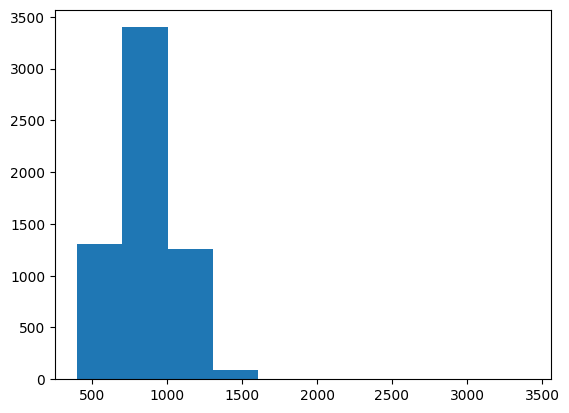

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(num_tokens)

In [7]:
incorrect_train_data = {
    'question': [],
    'answer': []
    
}

for graph_indx in range(num_graphs):
    for response_indx in range(num_responses):
        graph = train_dataset[graph_indx]['graph']
        source = train_dataset[graph_indx]['source']
        destination = train_dataset[graph_indx]['destination']
        response = train_dataset[graph_indx][f'response_{response_indx}']
        correct = train_dataset[graph_indx][f'correct_{response_indx}']
        if correct:
            continue
        # need to correct prompt
        incorrect_train_data['question'].append(prefix_template.format(graph, source, destination))
        
        answer = response
        answer = answer.replace('<reasoning>\n', '')
        answer = answer.replace('</reasoning>', '</think>')
        incorrect_train_data['answer'].append(answer)



In [8]:
from datasets import Dataset, DatasetDict
incorrect_train_data = Dataset.from_dict(incorrect_train_data)

In [9]:
incorrect_train_data

Dataset({
    features: ['question', 'answer'],
    num_rows: 6724
})

In [62]:
num_tokens = []
for i in range(6724):
    combined = f"{incorrect_train_data['question'][i]}\n{incorrect_train_data['answer'][i]}"
    num_tokens.append(len(tok.encode(combined)))

(array([3.517e+03, 2.770e+03, 3.040e+02, 3.400e+01, 8.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 8.300e+01]),
 array([ 408. ,  806.4, 1204.8, 1603.2, 2001.6, 2400. , 2798.4, 3196.8,
        3595.2, 3993.6, 4392. ]),
 <BarContainer object of 10 artists>)

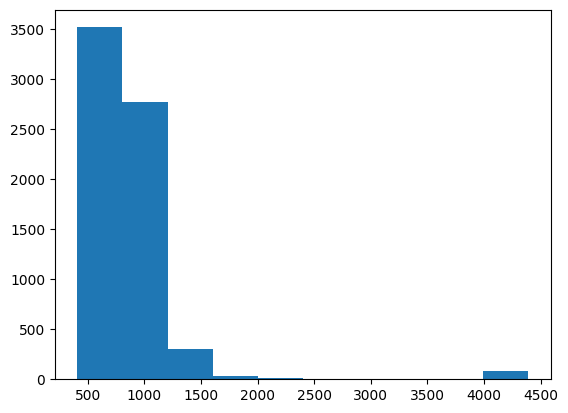

In [63]:
plt.hist(num_tokens)

In [ ]:
# Could not find response key
# Max tokens
# Push the entire mode.

: 

In [1]:
from datasets import load_from_disk

dataset = load_from_disk("Results/2025-04-15/00:29:07.768139_star-graph-deg-5-path-5-nodes-300-sft-qwen-1.5bi-deg-5-path-5-nodes-300-qwen-14bi-final2-corr")

/network/scratch/b/buvanesa/conda_envs/torch_cuda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset['correct_1']

[0, 0, 1, 1, 1, 0, 0, 1, 0, 0]